In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

loading the walmart sales and copying data into another dataframe ws

In [ ]:
walmart_sales = pd.read_csv('/content/Walmart_sales.csv')
ws = walmart_sales.copy(deep = 1)
ws.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df=ws.copy(deep=True)

part-01 -->Data Preprocessing


In [ ]:
ws

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
ws.shape

(6435, 8)

In [ ]:
ws.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#EDA

In [ ]:
# checking the missing values
ws.isnull().sum().sum()


0

In [ ]:
ws.shape

(6435, 8)

#Preprocessing


In [ ]:
ws['WeekOfMonth']=pd.to_datetime(ws['Date'], format='%d-%m-%Y').dt.isocalendar().week
ws.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,WeekOfMonth
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,6
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,7
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,8
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,9


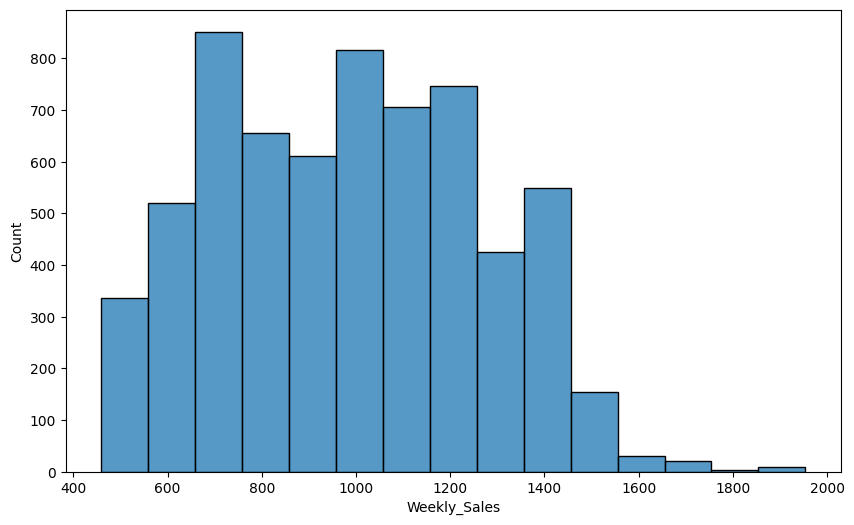

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.sqrt(ws['Weekly_Sales']), bins=15);

Extraction of target

In [ ]:
X=ws.drop(['Date', 'Weekly_Sales'], axis=1)
y=np.sqrt(ws['Weekly_Sales'])
X.head().to_string()

'   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  WeekOfMonth\n0      1             0        42.31       2.572  211.096358         8.106            5\n1      1             1        38.51       2.548  211.242170         8.106            6\n2      1             0        39.93       2.514  211.289143         8.106            7\n3      1             0        46.63       2.561  211.319643         8.106            8\n4      1             0        46.50       2.625  211.350143         8.106            9'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X=scaler.fit_transform(X_train, y_train)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6
0,1.600472,-0.268712,-1.765418,-0.173978,-1.061606,-1.029556,1.714352
1,0.291601,-0.268712,0.310091,1.839983,-0.735573,0.126742,0.866393
2,-1.325239,3.721455,0.129942,-0.274567,1.237749,-0.776466,1.502362
3,-0.786293,-0.268712,-0.915680,0.385820,-1.063975,-0.861543,1.290373
4,1.446487,-0.268712,0.444118,1.019966,-1.063975,-0.068561,1.290373


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10, random_state=42,ignored_features=["WeekOfMonth"])

In [ ]:
model=model.fit(X_train, y_train, eval_set=(X_test, y_test))
model

0:	learn: 227.7178667	test: 230.7636803	best: 230.7636803 (0)	total: 2.42ms	remaining: 2.42s
10:	learn: 192.0471513	test: 192.6110937	best: 192.6110937 (10)	total: 21.4ms	remaining: 1.92s
20:	learn: 166.8183759	test: 166.7863608	best: 166.7863608 (20)	total: 42.5ms	remaining: 1.98s
30:	learn: 148.0899713	test: 147.8008897	best: 147.8008897 (30)	total: 60.9ms	remaining: 1.9s
40:	learn: 134.1546025	test: 133.7779556	best: 133.7779556 (40)	total: 79.5ms	remaining: 1.86s
50:	learn: 121.9372499	test: 121.7699266	best: 121.7699266 (50)	total: 102ms	remaining: 1.9s
60:	learn: 110.4209559	test: 110.5384208	best: 110.5384208 (60)	total: 121ms	remaining: 1.86s
70:	learn: 102.3775446	test: 102.6150199	best: 102.6150199 (70)	total: 140ms	remaining: 1.83s
80:	learn: 93.7477525	test: 93.9665386	best: 93.9665386 (80)	total: 160ms	remaining: 1.81s
90:	learn: 88.3216228	test: 88.8228650	best: 88.8228650 (90)	total: 179ms	remaining: 1.78s
100:	learn: 83.3680969	test: 83.9688841	best: 83.9688841 (100)	to

In [ ]:
print(23.26951638 ** 2)


541.4703925590883


In [ ]:
print(ws['Weekly_Sales'].mean())

1046964.8775617715


In [ ]:
print(ws['Weekly_Sales'].std())

564366.6220536975


#Prediction

In [ ]:
pred=np.power(model.predict(X_test),2)
y_test_org=np.power((y_test), 2)

In [ ]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test_org, pred)
MAE

68937.93587584147

#R2 Score

In [ ]:

R2=metrics.r2_score(y_test_org, pred)
R2


0.9507820162988321

#MLR

# saving the train model

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model =pickle.load(open('trained_model.sav','rb'))

In [ ]:
# loading the standardlized model
filename = 'standard_model.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
# loading the saved model
std_model =pickle.load(open('standard_model.sav','rb'))

In [ ]:
input_data = (1,0,42.31,2.572,211.0963582,8.106)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
#std_data = scaler.transform(input_data_reshaped)
new_scaler = StandardScaler()
new_scaler.fit(input_data_reshaped)
std_data = new_scaler.transform(input_data_reshaped)
print(std_data)
prediction = model.predict(std_data)
print(prediction)


[[0. 0. 0. 0. 0. 0.]]
[1369.56964595]
